In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Analytics Project/Data/Complete Data/FINAL_RAW_DF.csv')
data_raw = data.copy()
data['release_date'] = data['release_date'].astype('datetime64[ns]')
data['release_date'] = data['release_date'].dt.year
playlist = pd.read_csv('/content/drive/MyDrive/Analytics Project/Initial Model/playlist_df _TRIAL.csv')
playlist['release_date'] = playlist['release_date'].astype('datetime64[ns]')
playlist['release_date'] = playlist['release_date'].dt.year
data.head()

,track_id,track_name,artist_name,popularity,album,uri,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,release_date
0,1Es7AUAhQvapIcoh3qMKDL,Timeless (with Playboi Carti),"['The Weeknd', 'Playboi Carti']",92,Timeless,spotify:track:1Es7AUAhQvapIcoh3qMKDL,0.769,0.722,11,-5.485,...,0.1110,0.570,119.973,audio_features,1Es7AUAhQvapIcoh3qMKDL,https://api.spotify.com/v1/tracks/1Es7AUAhQvap...,https://api.spotify.com/v1/audio-analysis/1Es7...,256000,4,2024.0
1,7CyPwkp0oE8Ro9Dd5CUDjW,"One Of The Girls (with JENNIE, Lily Rose Depp)","['The Weeknd', 'JENNIE', 'Lily-Rose Depp']",90,The Idol Episode 4 (Music from the HBO Origina...,spotify:track:7CyPwkp0oE8Ro9Dd5CUDjW,0.264,0.640,8,-6.221,...,0.1510,0.190,84.828,audio_features,7CyPwkp0oE8Ro9Dd5CUDjW,https://api.spotify.com/v1/tracks/7CyPwkp0oE8R...,https://api.spotify.com/v1/audio-analysis/7CyP...,244685,4,2023.0
2,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,['The Weeknd'],88,After Hours,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,0.513,0.730,1,-5.940,...,0.0897,0.334,171.001,audio_features,0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4,2020.0
3,7MXVkk9YMctZqd1Srtv4MB,Starboy,"['The Weeknd', 'Daft Punk']",87,Starboy,spotify:track:7MXVkk9YMctZqd1Srtv4MB,0.679,0.587,7,-7.015,...,0.1370,0.486,186.003,audio_features,7MXVkk9YMctZqd1Srtv4MB,https://api.spotify.com/v1/tracks/7MXVkk9YMctZ...,https://api.spotify.com/v1/audio-analysis/7MXV...,230453,4,2016.0
4,2LBqCSwhJGcFQeTHMVGwy3,Die For You,['The Weeknd'],84,Starboy,spotify:track:2LBqCSwhJGcFQeTHMVGwy3,0.586,0.525,1,-7.163,...,0.1340,0.508,133.629,audio_features,2LBqCSwhJGcFQeTHMVGwy3,https://api.spotify.com/v1/tracks/2LBqCSwhJGcF...,https://api.spotify.com/v1/audio-analysis/2LBq...,260253,4,2016.0


In [ ]:
data = data.select_dtypes(include=np.number)
data = data.dropna()

In [ ]:
X = data.to_numpy()
print(data.shape)

(22077, 15)


In [ ]:
subset_X = X[:1000]
subset_data_raw = data_raw.head(1000)
subset_data = data.head(1000)
subset_data

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_date
0,92,0.769,0.722,11,-5.485,0,0.0507,0.05840,0.000003,0.1110,0.570,119.973,256000,4,2024.0
1,90,0.264,0.640,8,-6.221,1,0.0442,0.03930,0.000002,0.1510,0.190,84.828,244685,4,2023.0
2,88,0.513,0.730,1,-5.940,1,0.0598,0.00143,0.000095,0.0897,0.334,171.001,200040,4,2020.0
3,87,0.679,0.587,7,-7.015,1,0.2760,0.14100,0.000006,0.1370,0.486,186.003,230453,4,2016.0
4,84,0.586,0.525,1,-7.163,0,0.0615,0.11100,0.000000,0.1340,0.508,133.629,260253,4,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,73,0.754,0.763,7,-4.627,0,0.0435,0.03010,0.000022,0.0901,0.464,117.953,164819,4,2023.0
996,75,0.558,0.655,0,-5.476,1,0.0379,0.20800,0.000000,0.0854,0.390,129.890,156923,4,2024.0
997,71,0.673,0.659,3,-4.493,0,0.0439,0.53900,0.000000,0.1290,0.628,88.011,179053,4,2021.0
998,70,0.614,0.934,9,-3.709,0,0.0700,0.06970,0.000000,0.1210,0.436,116.001,174760,4,2020.0


In [ ]:
playlist.head()

,track_id,track_name,artist_name,popularity,album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,release_date
0,0LN0ASTtcGIbNTnjSHG6eO,Pour Some Sugar On Me (2012),['Def Leppard'],0,Pour Some Sugar On Me (2012),0.497,0.849,9,-5.352,1,0.0612,0.00985,0.000000,0.106,0.720,169.937,audio_features,261532,4,1987
1,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,['AC/DC'],84,Highway to Hell,0.574,0.913,6,-4.793,0,0.1330,0.06100,0.001580,0.156,0.423,115.728,audio_features,208400,4,1979
2,37ZJ0p5Jm13JPevGcx4SkF,Livin' On A Prayer,['Bon Jovi'],83,Slippery When Wet,0.532,0.887,0,-3.757,1,0.0335,0.07780,0.000206,0.294,0.794,122.509,audio_features,249293,4,1986
3,5RKQ5NdjSh2QzD4MaunT91,Don't Stop Believin' (2022 Remaster),['Journey'],85,Escape (2022 Remaster),0.505,0.754,4,-7.435,1,0.0366,0.13200,0.000000,0.204,0.510,119.204,audio_features,249600,4,1981
4,7tFiyTwD0nx5a1eklYtX2J,Bohemian Rhapsody - Remastered 2011,['Queen'],69,A Night At The Opera (Deluxe Remastered Version),0.391,0.402,0,-9.961,0,0.0539,0.28900,0.000000,0.243,0.228,143.879,audio_features,354320,4,1975


In [ ]:
playlist_numeric = playlist.select_dtypes(include=np.number)
playlist_numeric = playlist_numeric.dropna()
playlist_numeric.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_date
0,0,0.497,0.849,9,-5.352,1,0.0612,0.00985,0.000000,0.106,0.720,169.937,261532,4,1987
1,84,0.574,0.913,6,-4.793,0,0.1330,0.06100,0.001580,0.156,0.423,115.728,208400,4,1979
2,83,0.532,0.887,0,-3.757,1,0.0335,0.07780,0.000206,0.294,0.794,122.509,249293,4,1986
3,85,0.505,0.754,4,-7.435,1,0.0366,0.13200,0.000000,0.204,0.510,119.204,249600,4,1981
4,69,0.391,0.402,0,-9.961,0,0.0539,0.28900,0.000000,0.243,0.228,143.879,354320,4,1975


In [ ]:
# Calculate the mean of each numeric column
playlist_mean = playlist_numeric.mean()

# Calculate the mode for categorical/ordinal columns
most_common_key = playlist_numeric['key'].mode()[0]
most_common_mode = playlist_numeric['mode'].mode()[0]
most_common_time_signature = playlist_numeric['time_signature'].mode()[0]

# Create a DataFrame to display both mean and most common values
playlist_summary = playlist_mean.to_frame(name='mean_value').T
playlist_summary['key'] = most_common_key
playlist_summary['mode'] = most_common_mode
playlist_summary['time_signature'] = most_common_time_signature

playlist_summary

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_date
mean_value,66.531073,0.516922,0.736696,9,-7.757869,1,0.058049,0.131311,0.032966,0.187681,0.553875,126.205465,256540.579096,4,1987.107345


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset_X)

In [ ]:
playlist_summary = playlist_summary.to_numpy()
playlist_summary_scaled = scaler.transform(playlist_summary)
playlist_summary_scaled

array([[-0.7511171 , -1.1304057 ,  0.39544003,  1.06022694, -0.87378398,
         0.93416229, -0.42123492, -0.31835158,  0.31444594,  0.03829053,
         0.12794427,  0.26425041,  0.85020335,  0.10546253, -2.98341617]])

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Analytics Project/Data/Complete Data/FINAL_RAW_DF.csv')
data_raw = data.copy()
data['release_date'] = data['release_date'].astype('datetime64[ns]')
data['release_date'] = data['release_date'].dt.year
playlist = pd.read_csv('/content/drive/MyDrive/Analytics Project/Initial Model/playlist_df _TRIAL.csv')
playlist['release_date'] = playlist['release_date'].astype('datetime64[ns]')
playlist['release_date'] = playlist['release_date'].dt.year
playlist.head()

,track_id,track_name,artist_name,popularity,album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,release_date
0,0LN0ASTtcGIbNTnjSHG6eO,Pour Some Sugar On Me (2012),['Def Leppard'],0,Pour Some Sugar On Me (2012),0.497,0.849,9,-5.352,1,0.0612,0.00985,0.000000,0.106,0.720,169.937,audio_features,261532,4,1987
1,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,['AC/DC'],84,Highway to Hell,0.574,0.913,6,-4.793,0,0.1330,0.06100,0.001580,0.156,0.423,115.728,audio_features,208400,4,1979
2,37ZJ0p5Jm13JPevGcx4SkF,Livin' On A Prayer,['Bon Jovi'],83,Slippery When Wet,0.532,0.887,0,-3.757,1,0.0335,0.07780,0.000206,0.294,0.794,122.509,audio_features,249293,4,1986
3,5RKQ5NdjSh2QzD4MaunT91,Don't Stop Believin' (2022 Remaster),['Journey'],85,Escape (2022 Remaster),0.505,0.754,4,-7.435,1,0.0366,0.13200,0.000000,0.204,0.510,119.204,audio_features,249600,4,1981
4,7tFiyTwD0nx5a1eklYtX2J,Bohemian Rhapsody - Remastered 2011,['Queen'],69,A Night At The Opera (Deluxe Remastered Version),0.391,0.402,0,-9.961,0,0.0539,0.28900,0.000000,0.243,0.228,143.879,audio_features,354320,4,1975


In [ ]:
playlist_concat_df = pd.read_csv('/content/drive/MyDrive/Analytics Project/Initial Model/training_data_df_TRIAL.csv')
playlist_concat_df['release_date'] = playlist_concat_df['release_date'].astype('datetime64[ns]')
playlist_concat_df['release_date'] = playlist_concat_df['release_date'].dt.year
playlist_concat_df.shape

(1416, 24)

In [ ]:
playlist_track_ids = playlist['track_id'].tolist()
playlist_concat_df['in_playlist'] = playlist_concat_df['track_id'].apply(lambda x: 1 if x in playlist_track_ids else 0)

In [ ]:
playlist_concat_df.head()

,track_id,track_name,artist_name,popularity,album,uri,danceability,energy,key,loudness,...,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,release_date,in_playlist
0,1nmZ8yqKkfooOuYvtFctDp,Heat Of The Moment,['Asia'],67,Asia,NaN,0.306,0.860,1,-7.371,...,0.541,136.265,audio_features,NaN,NaN,NaN,227893,4,1982.0,1
1,50eJOxJiGmJ7PBZaTKpje1,make up sex (feat. blackbear),"['mgk', 'blackbear']",60,mainstream sellout,spotify:track:50eJOxJiGmJ7PBZaTKpje1,0.665,0.678,5,-4.122,...,0.682,131.986,audio_features,50eJOxJiGmJ7PBZaTKpje1,https://api.spotify.com/v1/tracks/50eJOxJiGmJ7...,https://api.spotify.com/v1/audio-analysis/50eJ...,122570,4,2022.0,0
2,2EqlS6tkEnglzr7tkKAAYD,Come Together - Remastered 2009,['The Beatles'],75,Abbey Road (Remastered),NaN,0.530,0.376,9,-11.913,...,0.188,164.775,audio_features,NaN,NaN,NaN,259946,4,1969.0,1
3,3cbJ48vdcTrBMeereYxYUc,No Puedo Olvidarlo,['Marisela'],61,15 Éxitos de Marisela Vol. 1,spotify:track:3cbJ48vdcTrBMeereYxYUc,0.642,0.205,4,-18.716,...,0.545,93.259,audio_features,3cbJ48vdcTrBMeereYxYUc,https://api.spotify.com/v1/tracks/3cbJ48vdcTrB...,https://api.spotify.com/v1/audio-analysis/3cbJ...,243427,4,1998.0,0
4,2CtemffYhT0DJWcT1XW047,Nothing Else Matters (Remastered),['Metallica'],68,Metallica (Remastered),spotify:track:2CtemffYhT0DJWcT1XW047,0.547,0.394,4,-9.793,...,0.170,142.370,audio_features,2CtemffYhT0DJWcT1XW047,https://api.spotify.com/v1/tracks/2CtemffYhT0D...,https://api.spotify.com/v1/audio-analysis/2Cte...,388733,3,1991.0,1


# Feature Selection

In [ ]:
#Dropped loudness because it is highly corelated with energy and acousticness. Thus the information it contanains can be captured by other features.

In [ ]:
X_vals = playlist_concat_df.drop(['track_id', 'track_name', 'artist_name', 'album', 'uri', 'type', 'id', 'track_href', 'analysis_url', 'in_playlist', 'loudness'], axis = 1)
y_vals = playlist_concat_df['in_playlist']

Collinearity
Energy  and Loudness

Loudness and acoustic ness

The variability captured by loudness can be captured with the other features
And loudness is very skewed according to the violin plot therefore we can drop  it

We have very ahighly skewed variables instrumentales and speechiness


# Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vals, y_vals, test_size=0.3, random_state=21)

In [ ]:
from sklearn import preprocessing
import numpy as np

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

DTC = DecisionTreeClassifier()

distributions = {'max_depth': randint(1, 10), 'min_samples_split': randint(2, 50)}
DT = RandomizedSearchCV(DTC, distributions, cv = 5, verbose = 2, random_state = 42, n_jobs=-1, return_train_score = True, n_iter = 500)
searchDT = DT.fit(X_train, y_train)
print('Best performance using decision tree is '+ str(searchDT.best_score_) + ' with a max depth of ' + str(searchDT.best_params_['max_depth']) + ' and a min samples split of '+ str(searchDT.best_params_['min_samples_split']))

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
print('Best performance using decision tree is '+ str(searchDT.best_score_) + ' with a max depth of ' + str(searchDT.best_params_['max_depth']) + ' and a min samples split of '+ str(searchDT.best_params_['min_samples_split']))

Best performance using decision tree is 0.8627480838536116 with a max depth of 1 and a min samples split of 37


In [ ]:
DTC = DecisionTreeClassifier
max_depth = searchDT.best_params_['max_depth']
min_samples_split = searchDT.best_params_['min_samples_split']

best_clf = DTC(max_depth = max_depth, min_samples_split = min_samples_split)
best_clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)

test accuracy:  0.851764705882353
Precision:  0.8237885462555066
Recall 0.8904761904761904
Fall-out rate:  0.18604651162790697
F1 score 0.8558352402745995


Text(50.722222222222214, 0.5, 'Actual')

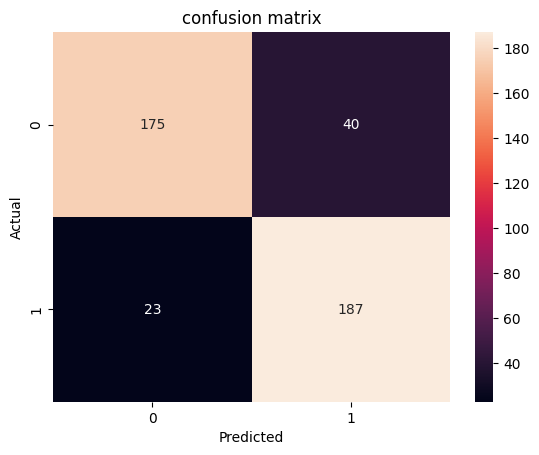

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

FP = cm[0, 1]
TN = cm[0, 0]

precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print('test accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred))
print('Recall', metrics.recall_score(y_test, y_pred))
print('Fall-out rate: ', FP / (FP + TN))
print('F1 score', 2*((recall*precision)/(recall + precision)))

sns.heatmap(data = cm, annot = True, fmt='.3g')
plt.title('confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')


# Random Forest

In [ ]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Random Forest Classifier
RFC = RandomForestClassifier(random_state=42)

# Define distributions for hyperparameter tuning
distributions = {
    'n_estimators': randint(50, 300),  # Number of trees
    'max_depth': randint(1, 15),      # Maximum depth of each tree
    'min_samples_split': randint(2, 50),  # Minimum samples required to split an internal node
    'min_samples_leaf': randint(1, 20)    # Minimum samples required to be at a leaf node
}

# Randomized search on hyperparameters
RF = RandomizedSearchCV(
    RFC,
    distributions,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    return_train_score=True,
    n_iter=500
)

searchRF = RF.fit(X_train, y_train)

# Displaying the best hyperparameters and performance
print('Best performance using random forest is ' + str(searchRF.best_score_) + ' with parameters: ' + str(searchRF.best_params_))


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best performance using random forest is 0.9010862392771941 with parameters: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 26, 'n_estimators': 244}


In [ ]:
# Retrain the best model
best_clf = RandomForestClassifier(
    n_estimators=searchRF.best_params_['n_estimators'],
    max_depth=searchRF.best_params_['max_depth'],
    min_samples_split=searchRF.best_params_['min_samples_split'],
    min_samples_leaf=searchRF.best_params_['min_samples_leaf'],
    random_state=42
)

best_clf.fit(X_train, y_train)

# Predictions
y_pred = best_clf.predict(X_test)


Test accuracy:  0.8894117647058823
Precision:  0.8590308370044053
Recall:  0.9285714285714286
Fall-out rate:  0.14883720930232558
F1 score:  0.8924485125858124


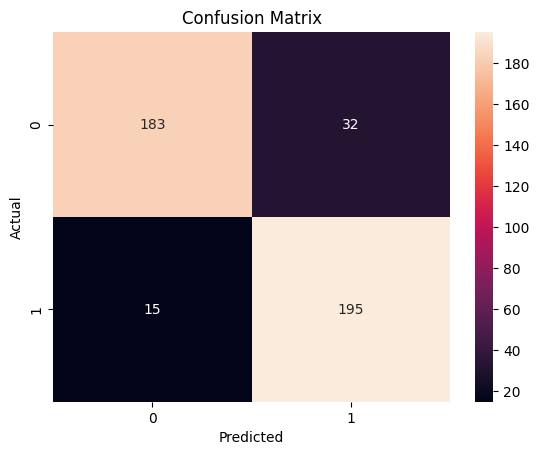

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculating metrics
FP = cm[0, 1]
TN = cm[0, 0]

precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print('Test accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', precision)
print('Recall: ', recall)
print('Fall-out rate: ', FP / (FP + TN))
print('F1 score: ', 2 * ((recall * precision) / (recall + precision)))

# Plotting confusion matrix
sns.heatmap(data=cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Support Vector Machines (SVM)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

# SVM Classifier
SVC_model = SVC(random_state=42)

# Define distributions for hyperparameter tuning
distributions = {
    'C': uniform(0.1, 10),      # Regularization parameter
    'gamma': uniform(0.001, 1), # Kernel coefficient
    'kernel': ['rbf', 'poly', 'sigmoid']  # Types of kernels
}

# Randomized search on hyperparameters
SVM = RandomizedSearchCV(
    SVC_model,
    distributions,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    return_train_score=True,
    n_iter=500
)

searchSVM = SVM.fit(X_train, y_train)

# Displaying the best hyperparameters and performance
print('Best performance using SVM is ' + str(searchSVM.best_score_) +
      ' with parameters: ' + str(searchSVM.best_params_))


Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best performance using SVM is 0.902101416171768 with parameters: {'C': 8.128534485980113, 'gamma': 0.005632023004602859, 'kernel': 'rbf'}


In [ ]:
# Retrain the best model
best_clf = SVC(
    C=searchSVM.best_params_['C'],
    gamma=searchSVM.best_params_['gamma'],
    kernel=searchSVM.best_params_['kernel'],
    random_state=42
)

best_clf.fit(X_train, y_train)

import numpy as np

# Replace NaN with the column mean in X_test
col_means = np.nanmean(X_test, axis=0)  # Calculate mean of each column, ignoring NaNs
indices = np.where(np.isnan(X_test))   # Find indices of NaNs
X_test[indices] = np.take(col_means, indices[1])  # Replace NaNs with corresponding column means

print("Imputation complete. No NaN values in X_test now:", np.isnan(X_test).sum())

# Predictions
y_pred = best_clf.predict(X_test)

Imputation complete. No NaN values in X_test now: 0


Test accuracy:  0.9035294117647059
Precision:  0.8755555555555555
Recall:  0.9380952380952381
Fall-out rate:  0.13023255813953488
F1 score:  0.9057471264367816


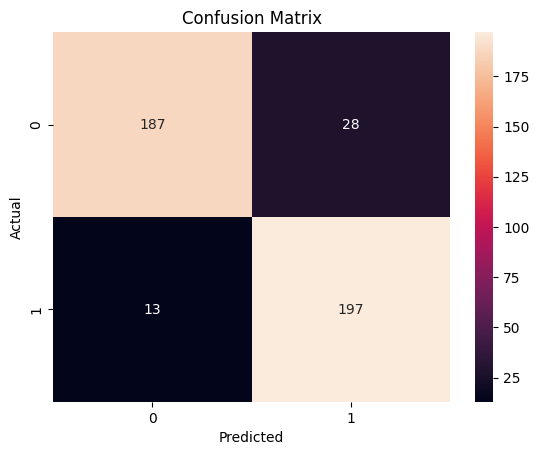

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculating metrics
FP = cm[0, 1]
TN = cm[0, 0]

precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print('Test accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', precision)
print('Recall: ', recall)
print('Fall-out rate: ', FP / (FP + TN))
print('F1 score: ', 2 * ((recall * precision) / (recall + precision)))

# Plotting confusion matrix
sns.heatmap(data=cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import uniform, randint

# XGBoost Classifier
XGB = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define distributions for hyperparameter tuning
distributions = {
    'n_estimators': randint(50, 300),  # Number of trees
    'max_depth': randint(1, 15),      # Maximum tree depth
    'learning_rate': uniform(0.01, 0.5),  # Learning rate
    'subsample': uniform(0.5, 0.5),   # Subsample ratio of the training instances
    'colsample_bytree': uniform(0.5, 0.5)  # Subsample ratio of columns
}

# Randomized search on hyperparameters
XGB_search = RandomizedSearchCV(
    XGB,
    distributions,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    return_train_score=True,
    n_iter=500
)

searchXGB = XGB_search.fit(X_train, y_train)

# Displaying the best hyperparameters and performance
print('Best performance using XGBoost is ' + str(searchXGB.best_score_) +
      ' with parameters: ' + str(searchXGB.best_params_))


Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best performance using XGBoost is 0.9031267448352874 with parameters: {'colsample_bytree': 0.5606924697112144, 'learning_rate': 0.16163757378379778, 'max_depth': 3, 'n_estimators': 56, 'subsample': 0.846080670847066}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:55:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Retrain the best model
best_clf = XGBClassifier(
    n_estimators=searchXGB.best_params_['n_estimators'],
    max_depth=searchXGB.best_params_['max_depth'],
    learning_rate=searchXGB.best_params_['learning_rate'],
    subsample=searchXGB.best_params_['subsample'],
    colsample_bytree=searchXGB.best_params_['colsample_bytree'],
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

best_clf.fit(X_train, y_train)

# Predictions
y_pred = best_clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:55:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the XGBClassifier on the test set: {accuracy}")


Accuracy of the XGBClassifier on the test set: 0.9035294117647059


Test accuracy:  0.9035294117647059
Precision:  0.8789237668161435
Recall:  0.9333333333333333
Fall-out rate:  0.12558139534883722
F1 score:  0.9053117782909931


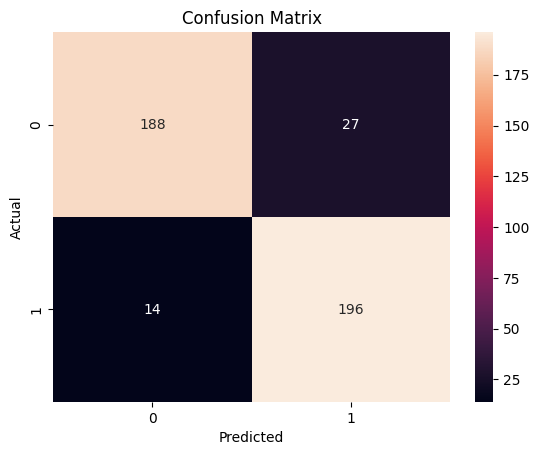

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculating metrics
FP = cm[0, 1]
TN = cm[0, 0]

precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print('Test accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', precision)
print('Recall: ', recall)
print('Fall-out rate: ', FP / (FP + TN))
print('F1 score: ', 2 * ((recall * precision) / (recall + precision)))

# Plotting confusion matrix
sns.heatmap(data=cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


XGBoost shows the bets performanc eand because it uses a forest fo trees it will not overfit on the data.